In [67]:
from qiskit import QuantumCircuit, QuantumRegister, Aer
from qiskit.execute_function import execute
from qiskit.tools.visualization import plot_bloch_multivector
from numpy import pi as PI
%matplotlib inline

In [68]:
def append_qft(circuit, qubit_num):
    def append_step(for_qubit):
        circuit.h(for_qubit)
        for control_qubit in range(for_qubit):
            circuit.cp(PI / (2 ** (for_qubit - control_qubit)),
                       control_qubit, for_qubit)

    for cur_step in reversed(range(qubit_num)):
        append_step(cur_step)

    for cur_swap in range(qubit_num // 2):
        circuit.swap(cur_swap, qubit_num - 1 - cur_swap)

In [69]:
def qft(qubit_num, inverted=False, draw_filename=None):
    register = QuantumRegister(qubit_num, "data")
    circuit = QuantumCircuit()
    circuit.add_register(register)

    append_qft(circuit, qubit_num)
    if inverted:
        circuit = circuit.inverse()

    result_gate = circuit.to_gate(label="IQFT" if inverted else "QFT")

    return result_gate, circuit.draw("mpl", filename=draw_filename)

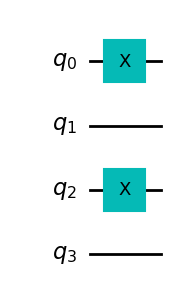

In [70]:
qubit_number = 4
qcircuit = QuantumCircuit(qubit_number)
qcircuit.x([0, 2])
qcircuit.draw("mpl")

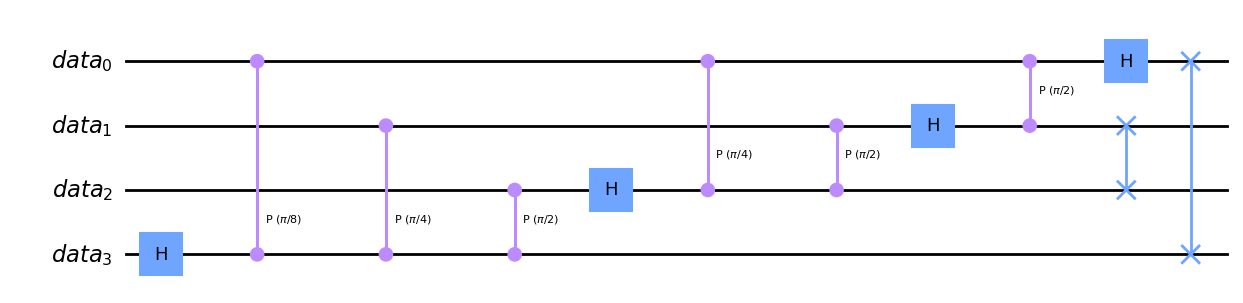

In [71]:
qft_gate, qft_pic = qft(qubit_number)
qft_pic

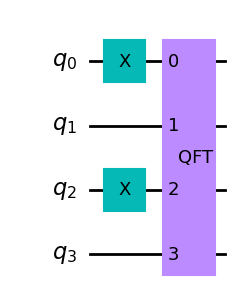

In [72]:
qcircuit.append(qft_gate, range(qubit_number))
qcircuit.draw("mpl")

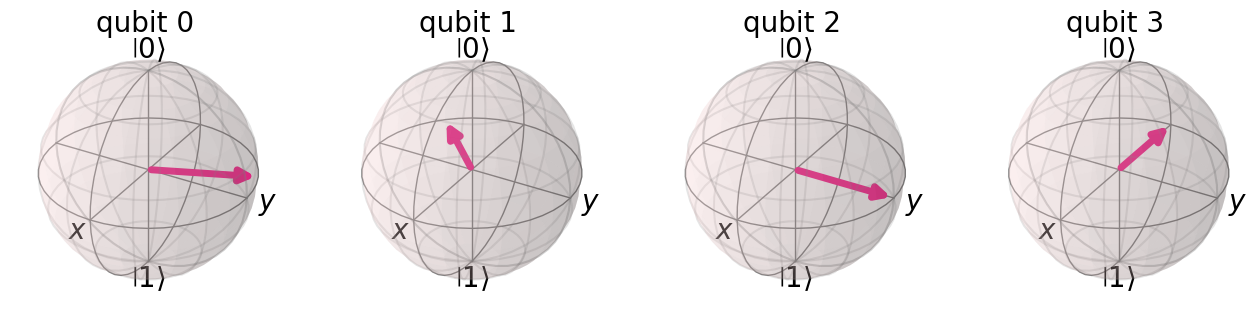

In [73]:
sim = Aer.get_backend("statevector_simulator")
job = execute(qcircuit, sim)
statevector = job.result().get_statevector()
plot_bloch_multivector(statevector)

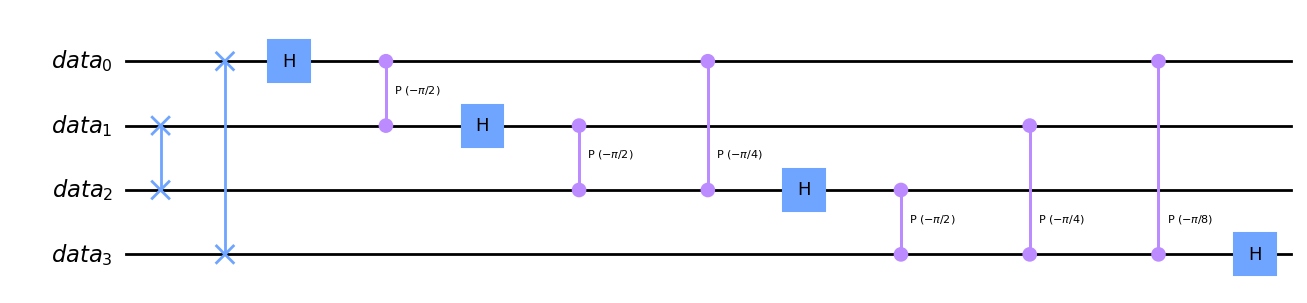

In [74]:
iqft_gate, iqft_pic = qft(qubit_number, inverted=True)
iqft_pic

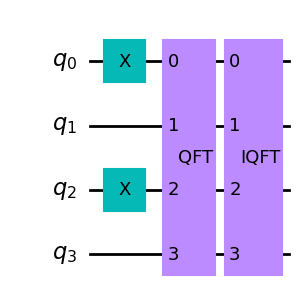

In [75]:
qcircuit.append(iqft_gate, range(qubit_number))
qcircuit.draw("mpl")

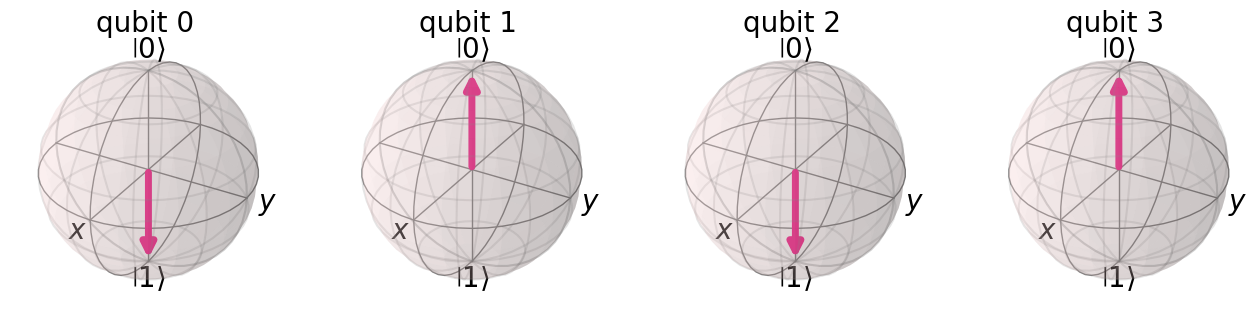

In [76]:
sim = Aer.get_backend("statevector_simulator")
job = execute(qcircuit, sim)
statevector = job.result().get_statevector()
plot_bloch_multivector(statevector)

In [77]:
qcircuit.measure_all()
sim = Aer.get_backend("aer_simulator")
job = execute(qcircuit, sim)
counts = job.result().get_counts()
counts

{'0101': 1024}